<a href="https://colab.research.google.com/github/Maximokill/hand-written-ML-methods/blob/main/K_means_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

Зададим основные параметры выборки и сгенерируем данные:

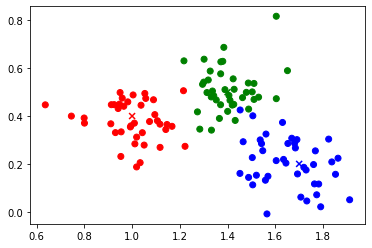

In [42]:
num_clusters = 3 # количество кластеров
cluster_size = 40 # количество точек в кластере

cluster_x = [1.0, 1.4, 1.7] # координаты кластеров по х
cluster_y = [0.4, 0.5, 0.2] # координаты кластеров по y
std = 0.1


def generate_points(num_cluster, cluster_size, std, centers_x, centers_y):
    '''
    @param num_cluster: количество кластеров в выборке
    @param cluster_size: размер кластера
    @param std: среднеквадратичное отклонение
    @param centers_x: координата центров кластеров по оси Х
    @param centers_y: координата центров кластеров по оси У
    '''
    # список для хранения координат точек
    points = []

    # генерация точек
    for cluster in range(num_clusters):
        for point in range(cluster_size):
            x_i = np.random.normal(loc=centers_x[cluster], scale=std)
            y_i = np.random.normal(loc=centers_y[cluster], scale=std)
            points.append((x_i, y_i))

    points = np.array(points)

    return points

points = generate_points(num_clusters, cluster_size, std, cluster_x, cluster_y)

# построение точек, распределённых по кластерам
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points[:,0], y=points[:,1], c=colors)
plt.scatter(x=cluster_x, y=cluster_y, c=['r', 'g', 'b'], marker='x')
plt.show()

Реализация алгоритма K-means:

In [51]:
def k_means(points, num_clusters):
    '''
    @param points: список из пар координат точек
    @param num_clusters: число кластеров, на которое необходимо поделить выборку

    @return: метки кластеров и их центры
    '''
    # функция построения точек, распределённых по кластерам
    def print_clusters(n_iteration, points, result=None, centers=None):
        print(f'Итерация №{n_iteration}')
        plt.scatter(x=points[:, 0], y=points[:, 1], c=result)
        if centers.any():
            plt.scatter(x=centers[:, 0], y=centers[:, 1], marker='x')
        plt.show()
        print()
    
    # расчёт евклидова расстояния от каждой точки до выбранных центров кластеров
    def euclid_distance(points, centers):
        return np.sqrt(((points - centers) ** 2).sum(axis=1))
    
    centers = points[:num_clusters] # в качестве центров выбираем первые случайные N точек
    result = np.array([-1] * len(points)) # массив, элементы которого отвечают за пренадлежность к кластеру
    prev_result = None # результат принадлежности элементов выборки к кластеру на прошлом шаге

    n_iteration = 1

    # вывод начального результата
    print_clusters(0, points, result, centers)

    # работает до тех пор, пока кластеры не станут изменяться
    while (result != prev_result).any():
        prev_result = result[:]
        dist = np.array([np.inf] * len(points))
        # рассчёт расстояния от точек до каждого центра
        for n, center in enumerate(centers):
            # расчёт расстояния до центра каждого из кластеров
            curr_dist = euclid_distance(points, center)

            # присваиваем каждой точке свой кластер
            result = np.where(curr_dist < dist , n, result)
            dist = np.where(curr_dist < dist, curr_dist, dist)

        # получение распределения меток по класстерам
        labels = dict(list(zip(*np.unique(result, return_counts=True))))

        # центр новых кластеров
        curr_center = []

        # рассчёт новых центров каждого кластера
        for i in range(len(centers)):
            new_center = np.where(labels == i, points, np.array([0, 0])).sum(axis=0) / labels[i]
            curr_center.append(new_center)
        
        # вывод результата каждой итерации
        print_clusters(n_iteration, points, result, np.array(curr_center))
        n_iteration += 1

    return result, centers

Итерация №0


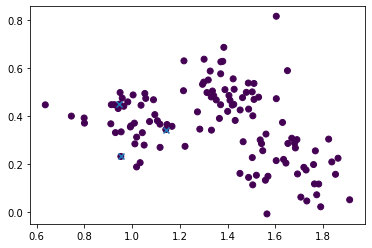


Итерация №1


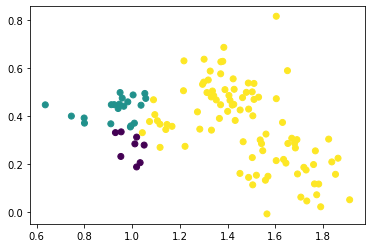


Итерация №2


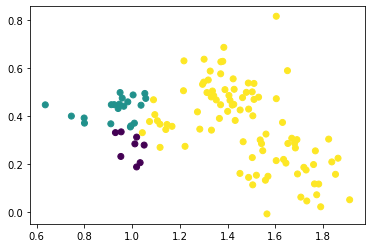

In [52]:
result, centers = k_means(points, 3)